<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%209/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV,

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

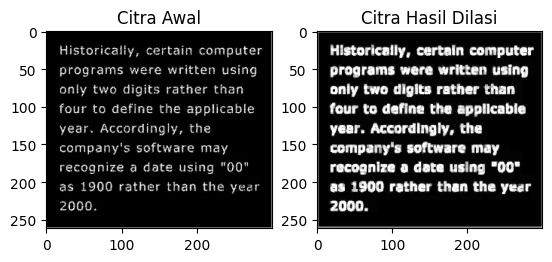

In [3]:
def dilation(image, kernel):
    height, width = image.shape[:2]
    output = np.zeros((height, width), dtype=np.uint8)
    kernel_height, kernel_width = kernel.shape[:2]
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_CONSTANT, value=0)

    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            if np.any(image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1] > 0):
                roi = image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1]
                roi = cv2.bitwise_or(roi, kernel)
                output[i-pad_height][j-pad_width] = np.max(roi)
            else:
                output[i-pad_height][j-pad_width] = 0

    return output

img_2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([
    [2, 2, 2],
    [2, 2, 2],
    [2, 2, 2]
], dtype=np.uint8)
dilated_image = dilation(img_2, kernel)

plt.subplot(121),plt.imshow(img_2, cmap='gray'),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilated_image, cmap='gray'),plt.title('Citra Hasil Dilasi')



4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

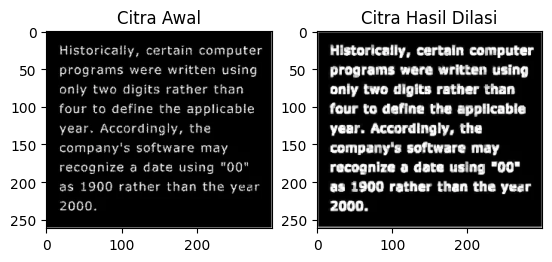

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(img, kernel, iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV,

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

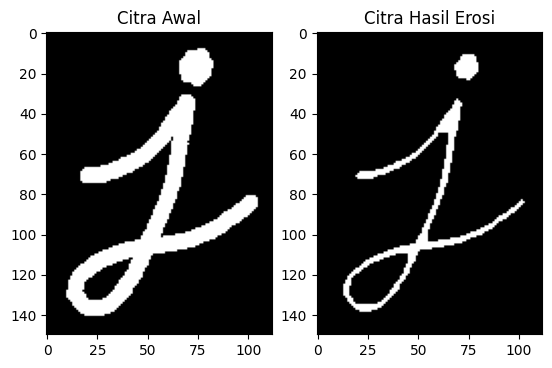

In [5]:
def erosi(image, kernel):
    m, n = image.shape[:2]
    k = kernel.shape[0]
    constant = (k-1) // 2
    imgErode = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = image[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * kernel
            imgErode[i, j] = np.min(product)

    return imgErode

img1 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)
kernel = np.ones((5, 5), dtype=np.uint8)

hasil_erosi = erosi(img1, kernel)

plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(hasil_erosi, cmap='gray'), plt.title('Citra Hasil Erosi')


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

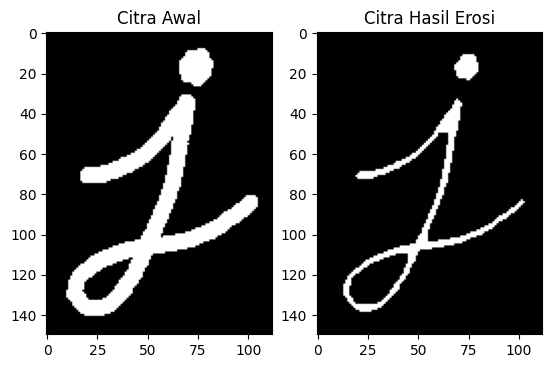

In [6]:
img_gambar_j = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

kernel = np.ones((5,5), np.uint8)
dilation = cv2.erode(img_gambar_j, kernel, iterations = 1)

plt.subplot(121),plt.imshow(img_gambar_j),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Erosi')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV,

# Libary

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

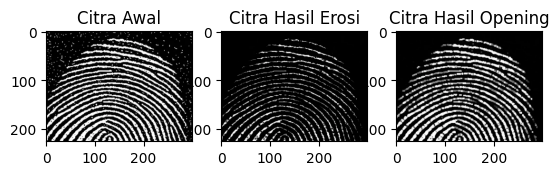

In [7]:
img_tugas_7 = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')

kernel_erosi = np.ones((3,3), np.uint8)
dilation = cv2.erode(img_tugas_7, kernel_erosi, iterations = 1)

kernel_opening = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img_tugas_7, cv2.MORPH_OPEN, kernel_opening)

plt.subplot(131),plt.imshow(img_tugas_7),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(dilation),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(opening),plt.title('Citra Hasil Opening')

# Tanpa Libary

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

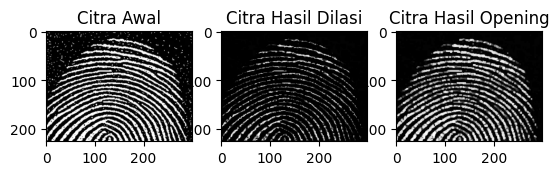

In [25]:
img_7_non_lib = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)
kernel_non_lib = np.array([
    [3, 3, 3],
    [3, 3, 3],
    [3, 3, 3]
], dtype=np.uint8)
eros = erosi(img_7_non_lib, kernel_non_lib)
dil = dilation(eros, kernel_non_lib)

plt.subplot(131),plt.imshow(img_7_non_lib, cmap='gray'),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(eros, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(dil, cmap='gray'),plt.title('Citra Hasil Opening')



8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,

# Libary

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

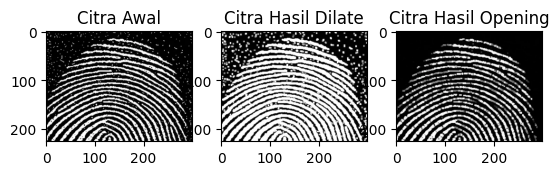

In [8]:
img_tugas_8 = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')

kernel_dilate = np.ones((3,3), np.uint8)
dilation = cv2.dilate(img_tugas_8, kernel_dilate, iterations = 1)

kernel_closing = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(img_tugas_8, cv2.MORPH_CLOSE, kernel_closing)

plt.subplot(131),plt.imshow(img_tugas_8),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(dilation),plt.title('Citra Hasil Dilate')
plt.subplot(133),plt.imshow(opening),plt.title('Citra Hasil Opening')

# Tanpa Libary

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

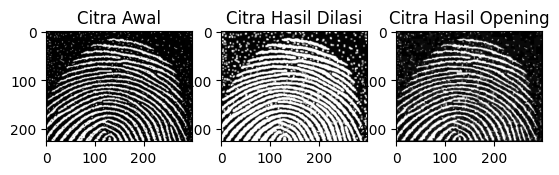

In [26]:
img_8_non_lib = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)
kernel_non_lib = np.array([
    [3, 3, 3],
    [3, 3, 3],
    [3, 3, 3]
], dtype=np.uint8)
dil_8 = dilation(img_8_non_lib, kernel_non_lib)
eros_8 = erosi(dil_8, kernel_non_lib)

plt.subplot(131),plt.imshow(img_8_non_lib, cmap='gray'),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(dil_8, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(eros_8, cmap='gray'),plt.title('Citra Hasil Opening')



9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5,

(<Axes: title={'center': 'Citra Hasil Cros 5x5'}>,
 Text(0.5, 1.0, 'Citra Hasil Cros 5x5'))

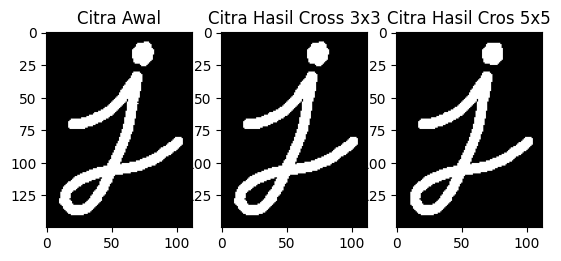

In [9]:
img_tugas_9 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

kernel_opening_1 = np.ones((3,3), np.uint8)
opening_3x3 = cv2.morphologyEx(img_tugas_9, cv2.MORPH_OPEN, kernel_opening_1)

kernel_opening_2 = np.ones((5,5), np.uint8)
opening_5x5 = cv2.morphologyEx(img_tugas_9, cv2.MORPH_OPEN, kernel_opening_2)

plt.subplot(131),plt.imshow(img_tugas_9),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(opening_3x3),plt.title('Citra Hasil Cross 3x3')
plt.subplot(133),plt.imshow(opening_5x5),plt.title('Citra Hasil Cros 5x5')

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5,

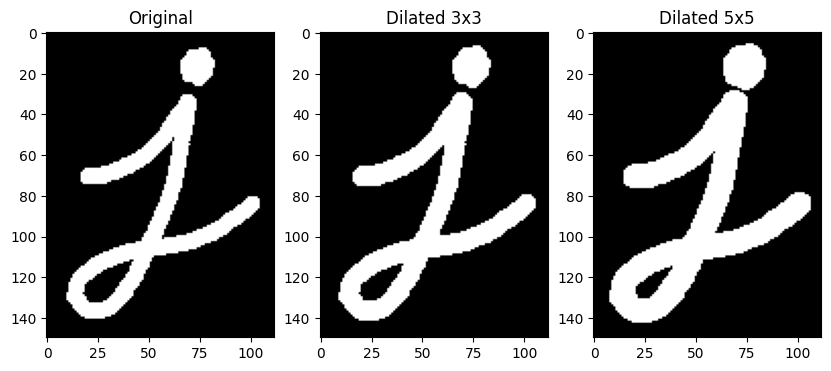

(<Axes: title={'center': 'Citra Hasil Dilated 5x5'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilated 5x5'))

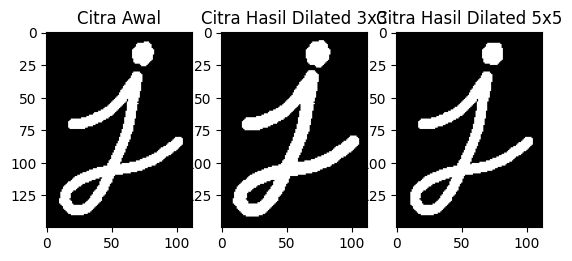

In [10]:
# Load the image
img_tugas_10 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

# Create a circular structuring element with size 3x3
se_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Dilate the image with the 3x3 structuring element
dilated_3x3 = cv2.dilate(img_tugas_10, se_3x3, iterations=1)

# Create a circular structuring element with size 5x5
se_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Dilate the image with the 5x5 structuring element
dilated_5x5 = cv2.dilate(img_tugas_10, se_5x5, iterations=1)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_tugas_10, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(dilated_3x3, cmap='gray')
axs[1].set_title('Dilated 3x3')
axs[2].imshow(dilated_5x5, cmap='gray')
axs[2].set_title('Dilated 5x5')
plt.show()

plt.subplot(131),plt.imshow(img_tugas_10),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(dilated_3x3),plt.title('Citra Hasil Dilated 3x3')
plt.subplot(133),plt.imshow(opening_5x5),plt.title('Citra Hasil Dilated 5x5')


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7,

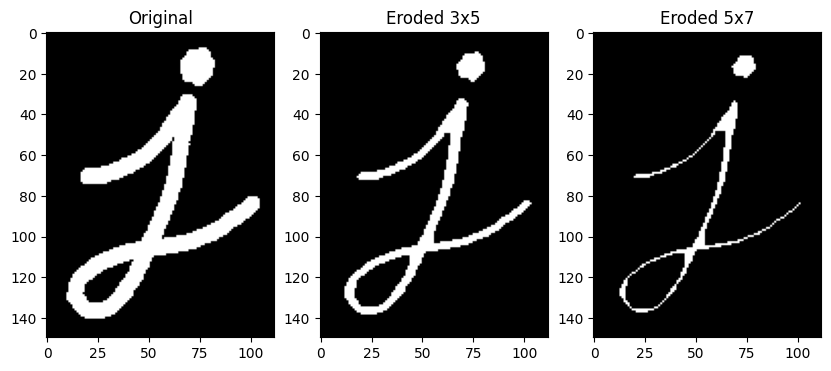

In [11]:
img_tugas_11 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

# Create a rectangular structuring element with size 3x5
se_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

# Erode the image with the 3x5 structuring element
eroded_3x5 = cv2.erode(img_tugas_11, se_3x5, iterations=1)

# Create a rectangular structuring element with size 5x7
se_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Erode the image with the 5x7 structuring element
eroded_5x7 = cv2.erode(img_tugas_11, se_5x7, iterations=1)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_tugas_11, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(eroded_3x5, cmap='gray')
axs[1].set_title('Eroded 3x5')
axs[2].imshow(eroded_5x7, cmap='gray')
axs[2].set_title('Eroded 5x7')
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5,

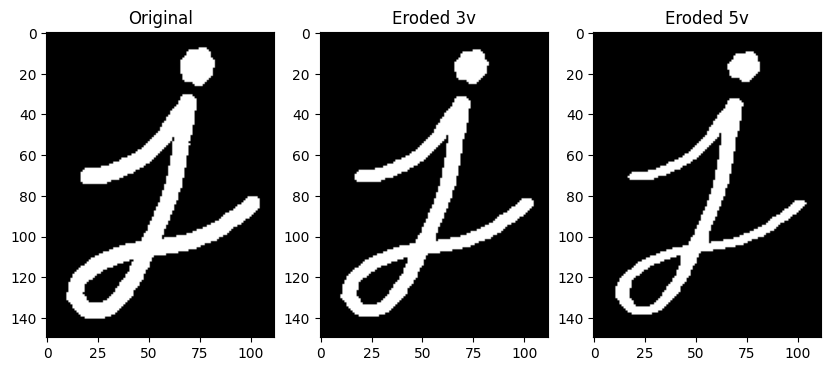

In [12]:
img_tugas_12 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

# Create a vertical line structuring element with length 3
tugas12_se_3v = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))

# Erode the image with the 3v structuring element
tugas12_eroded_3v = cv2.erode(img_tugas_12, tugas12_se_3v, iterations=1)

# Create a vertical line structuring element with length 5
tugas12_se_5v = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Erode the image with the 5v structuring element
tugas12_eroded_5v = cv2.erode(img_tugas_12, tugas12_se_5v, iterations=1)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_tugas_12, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(tugas12_eroded_3v, cmap='gray')
axs[1].set_title('Eroded 3v')
axs[2].imshow(tugas12_eroded_5v, cmap='gray')
axs[2].set_title('Eroded 5v')
plt.show()